In [ ]:
!pip install eleanor

     |████████████████████████████████| 6.7 MB 5.1 MB/s 
     |████████████████████████████████| 832 kB 38.7 MB/s 
     |████████████████████████████████| 245 kB 52.2 MB/s 
     |████████████████████████████████| 4.4 MB 41.7 MB/s 
     |████████████████████████████████| 110.5 MB 705 bytes/s 
     |████████████████████████████████| 22.3 MB 8.0 MB/s 
     |████████████████████████████████| 98 kB 6.4 MB/s 
     |████████████████████████████████| 41 kB 127 kB/s 
     |████████████████████████████████| 802 kB 43.7 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 3.2 MB 43.1 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 3.8 MB 50.2 MB/s 
     |████████████████████████████████| 2.9 MB 44.0 MB/s 
     |████████████████████████████████| 503 kB 65.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl size

In [ ]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [ ]:
star = eleanor.Source(tic=375506058,sector=15)
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)
q = data.quality == 0

No eleanor postcard has been made for your target (yet). Using TessCut instead.




100%|██████████| 1197/1197 [00:24<00:00, 48.74it/s]


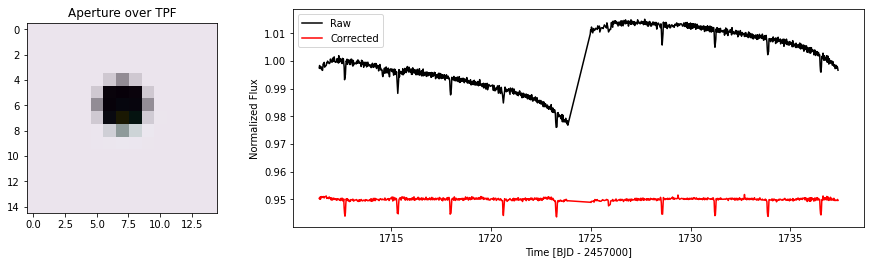

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.all_apertures[0], cmap='Greys', alpha=0.9)
ax1.set_title('Aperture over TPF')

ax2.plot(data.time[q], data.all_raw_flux[0][q]/np.nanmedian(data.all_raw_flux[0][q]), 'k', label='Raw')
ax2.plot(data.time[q], data.all_corr_flux[0][q]/np.nanmedian(data.all_corr_flux[0][q]) - 0.05, 'r', label='Corrected')
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux')
ax2.legend();

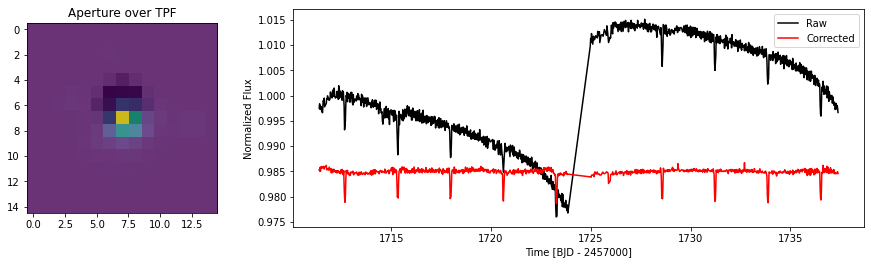

In [ ]:
eleanor.TargetData.custom_aperture(data, shape='circle', r=2, pos=[7,6], method='exact')
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.2)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.015, 'r', label='Corrected')
ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');